**Name:** LIUKECHENG

**EID:** kechenliu4

**Kaggle Team Name:** lkc

# CS5489 - Assignment 1 - Tweet Sentiment Analysis

## Goal
In this assignment, the task is predict the sentiment of Tweets about four technology companies, Apple, Microsoft, Google, and Twitter. Here are some examples of tweets with different sentiments:
  - **positive**: _"http://t.co/QV4m1Un9 Forget the phone.. Nice UI. Liking the Scroll Feature #android #google #nexus"_
  - **negative**: _"Have never had such poor customer service at @Apple before! What happened? (@ Apple Store w/ 2 others) http://t.co/GKlXMUi6"_
  - **neutral**: _"The lock screen now has facial recognition capability! #Google #Android #ICS"_.

Your goal is to train a classifier to predict whether a tweet is positive, neutral, or negative sentiment.


## Methodology
You need to train classifiers using the training data, and then predict on the test data. You are free to choose the feature extraction method and classifier algorithm.  You are free to use methods that were not introduced in class.  You should probably do cross-validation to select a good parameters.


## Evaluation on Kaggle

You need to submit your test predictions to Kaggle for evaluation.  50% of the test data will be used to show your ranking on the live leaderboard.  After the assignment deadline, the remaining 50% will be used to calculate your final ranking. Also the top-ranked entries will be asked to give a short 5 minute presentation on what they did.

To submit to Kaggle you need to create an account, and use the competition invitation that will be posted on Canvas.

**Note:** You can only submit 2 times per day to Kaggle!

## What to hand in
You need to turn in the following things:

1. This ipynb file with your source code and documentation. _**You should write about all the various attempts that you make to find a good solution.**_ You may also submit python scripts as source code, but your documentation must be in the ipynb file.
2. Your final submission file to Kaggle.
3. The ipynb file `Assignment1-Final.ipynb`, which contains the code that generates the final submission file that you submit to Kaggle.  **This code will be used to verify that your Kaggle submission is reproducible.**

Files should be uploaded to Assignment 1 on Canvas.

## Grading
The marks of the assignment are distributed as follows:
- 45% - Results using various classifiers and feature representations.
- 30% - Trying out feature representations (e.g. adding additional features) or classifiers not used in the tutorials/lectures.
- 20% - Quality of the written report.  More points for insightful observations and analysis.
- 5% - Final ranking on the Kaggle test data (private leaderboard). If a submission cannot be reproduced by the submitted code, it will not receive marks for ranking.
- **Late Penalty:** 25 marks will be subtracted for each day late.

**Note:** you should start early! Some classifiers may take a while to train.


## Kaggle Notebooks

If you like, you can use Kaggle notebooks to run your code. Note that you still need to submit your code to Canvas for grading.
<hr>

# Load the Data

The training data is in the text file `sanders_tweets_train.txt`.  This CSV file contains the  tweet, labels, and topics. The class labels are: `"positive"`, `"neutral"`, and `"negative"`. The training data also includes the corresponding tweet topics: `"apple"`, `"microsoft"`, `"google"`, and `"twitter"`.

The testing data is in the text file `sanders_tweets_test.txt`, and only contains the tweets.  The topics are not included, since they are not known at test time.

To submit to Kaggle, you need to generate a Kaggle submission files, which is CSV file with the following format: 

<pre>
Id,Prediction
1,neutral
2,neutral
3,positive
4,negative
...
</pre>

Here are two helpful functions for reading the text data and writing the Kaggle submission file.

In [ ]:
!pip install zhon
!pip install nltk
!pip install wordcloud

In [47]:
#汇合老师给的代码
%matplotlib inline
import IPython.core.display         
# setup output image format (Chrome works best)
IPython.core.display.set_matplotlib_formats("svg")
import matplotlib.pyplot as plt
import matplotlib
from numpy import *
from sklearn import *
from scipy import stats
import csv
random.seed(100)

def read_text_data(fname):
    txtdata = []
    classes = []
    topics  = []
    with open(fname, 'r',encoding='utf8') as csvfile:
        reader = csv.reader(csvfile, delimiter=',', quotechar='"')
        for row in reader:
            # get the text
            txtdata.append(row[0])
            # get the class (convert to integer)
            if len(row)>1:
                classes.append(row[1])
                topics.append(row[2])
    
    if (len(classes)>0) and (len(txtdata) != len(classes)):        
        raise Exception("mismatched length!")
    
    return (txtdata, classes, topics)

def write_csv_kaggle_sub(fname, Y):
    # fname = file name
    # Y is a list/array with class entries
    
    # header
    tmp = [['Id', 'Prediction']]
    
    # add ID numbers for each Y
    for (i,y) in enumerate(Y):
        tmp2 = [(i+1), y]
        tmp.append(tmp2)
        
    # write CSV file
    with open(fname, 'w',encoding='utf8') as f:
        writer = csv.writer(f)
        writer.writerows(tmp)

        
# load the data
# (if using Kaggle notebooks you need to include the directory path: /kaggle/input/cs5489-2020b-assignment-1/)
(traintxt, trainY, traintopic) = read_text_data("sanders_tweets_train.txt")
(testtxt, _, _)                = read_text_data("sanders_tweets_test.txt")

print(len(traintxt))
print(len(testtxt))

# header
tmp = [['index','text']]
    
# add ID numbers for each Y
for (index,x) in enumerate(traintxt):
    tmp2 = [index+1,x]
    tmp.append(tmp2)
        
# # write CSV file
# with open('formatData.csv', 'w',encoding='utf8') as f:
#     writer = csv.writer(f)
#     writer.writerows(tmp)

# header
tmp = [['index','text']]

# add ID numbers for each Y
for (index,x) in enumerate(testtxt):
    tmp2 = [index+1,x]
    tmp.append(tmp2)
        
# write CSV file
with open('formatTestData.csv', 'w',encoding='utf8') as f:
    writer = csv.writer(f)
    writer.writerows(tmp)

    
classnames = unique(trainY)
print(classnames)

# write your predictions on the test set
i = random.randint(len(classnames), size=len(testtxt))
predY = classnames[i]
# write_csv_kaggle_sub("my_submission.csv", predY)

print(trainY[0])
print(traintopic[0])
print(traintxt[35])

2396
1028
['negative' 'neutral' 'positive']
positive
google
RememberiN wen @apple and @blackberry were just fruit
#nostalgia


The below code will load the training and test sets.

Here is an example to write a csv file with predictions on the test set.  These are random predictions.

Look at the data:

# YOUR CODE and DOCUMENTATION HERE

大致实验思路：主要分为三部分。
***
***
第一部分是数据预处理。 


先使用nltk和正则进行标准化操作：

小写、去除标点符号、去除停顿词、提取词干、标注词性并使用词性来进行词形还原。

接着对format后的数据进行观察提取其他特征：  
   1）推特文本包含大量@XX、#XXX、rt（转发）、tweet（推文）和http开头的网页链接等对分类没有作用的无效名词，进行删除处理；  

2）并且每个推文都被标记与哪个公司有关，可考虑将公司名加入数据尾部。  

3）考虑删除数字   

4）大多数长度小于3的短单词都没什么用，考虑删除  

5）高频低频词汇考虑删除（k>300或k<=2，k表示至少在k个文档中出现，此k值根据freq_dist生成的频率图观察得到,在进行tf-idf时使用）

（有考虑删除的表示会根据是否提升分类效果来进行使用）
***
***
第二部分是特征提取

主要使用两种方法：tf-idf和word2vec。

tfidf将预处理并分完词的数据重新拼接为句子进行处理。  

word2vec使用gensim库
***
***
第三部分是训练模型并交叉验证寻找最优参数

本次实验使用了逻辑回归、多项式贝叶斯分类器、多层感知机、svm、adaboost、随机森林、cnn、lstm等模型。后续将会进行结果及参数分析

In [94]:
## 简单分词演示
import nltk
words = nltk.word_tokenize(traintxt[35])
print(words)

['RememberiN', 'wen', '@', 'apple', 'and', '@', 'blackberry', 'were', 'just', 'fruit', '#', 'nostalgia']


### 第一部分：数据预处理

具体见代码注释

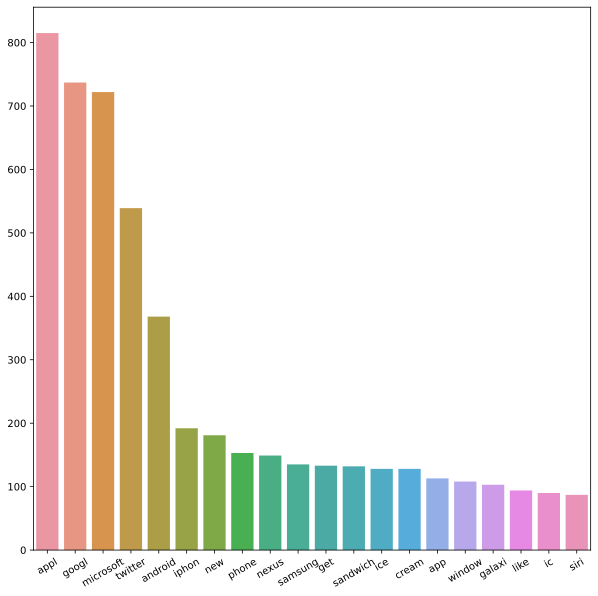

In [48]:
#数据预处理 特征工程
import string
import nltk
import re
from zhon.hanzi import punctuation
from nltk.stem import SnowballStemmer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import numpy as np
import pandas as pd 
import seaborn as sns
from gensim.models.word2vec import Word2Vec

def preProcess(data):
    #使用Snowball词干提取器(比porter表现好)
#     ps= PorterStemmer()
    ps = SnowballStemmer('english')

    #词形还原器
    lm = WordNetLemmatizer()

    ## 预处理后观察数据 是否还有应去掉的单词
    formatList= []

    for (index,x) in enumerate(data):
        # 数据加入公司标签(实测降低分类准确率)
#         x = x+ ' ' + traintopic[index]
        #
        #大小写转换
        x=x.lower()

#         #正则删除@之后的名词
#         x = re.sub('@\S+',' ',x)
                   
#         #正则删除标签#之后的名词
#         x = re.sub('#\S+',' ',x)
        
        #正则删除数字
        x = re.sub(r'\w*\d+\w*','',x)
        
        #去掉英文标点符号
        for i in string.punctuation:
            x = x.replace(i,'')

        #根据观察，还有一些中文标点符号，继续去除
        for i in punctuation:
            x = x.replace(i,'')
        
        #根据观察，rt和tweet都可以去掉（转发和推文的意思）
        for i in ['rt','tweet']:
            x = x.replace(i,'')
        
               
        #分词
        words = nltk.word_tokenize(x)

        #根据观察，数据集中去掉符号后的网页链接(http开头)无有效信息可以直接去除，但是单独的http和https不行
        filtered_words = [word for word in words if  (word.startswith('http') == 0 or word ==  'http' or word ==  'https')]
        #处理特殊情况（网页链接与前单词只有标点从而被视为一个单词，如2194行数据）
        for i,word in enumerate(filtered_words):
            if 'http' in word and word != 'https':
                filtered_words[i] = word.split('http')[0]
                
        

        #去除停顿词
        stopWord_filtered_words = [w for w in filtered_words if not w in nltk.corpus.stopwords.words('english')]

        #提取词干
        stemed_words = [ps.stem(word) for word in stopWord_filtered_words]
#         stemed_words = stopWord_filtered_words

        #词性标注(区分名词book和动词book)
        taged_words = nltk.pos_tag(stemed_words)

        #将标注的复杂词性转化为4个基本词性，供词性还原使用(词性还原默认为名词)
        def get_wordnet_pos(treebank_tag):
            if treebank_tag.startswith('J'):
                return wordnet.ADJ
            elif treebank_tag.startswith('V'):
                return wordnet.VERB
            elif treebank_tag.startswith('N'):
                return wordnet.NOUN
            elif treebank_tag.startswith('R'):
                return wordnet.ADV
            else:
                return wordnet.NOUN


        #词形还原（经验证 使用词形还原会降低预测率）
        lemmaed_words = [lm.lemmatize(word[0],get_wordnet_pos(word[0])) for word in taged_words]
#         lemmaed_words = stemed_words
    
        formatList.append([index+1 ,lemmaed_words])

    # 写入csv文件，方便对比观察
    with open('lemmatizedData.csv', 'w',encoding='utf8') as f:
        writer = csv.writer(f)
        writer.writerows(formatList)

    featuredTrainData =  [row[1] for row in formatList]

    #自制flat函数
    def flatten(t):
        return [item for sublist in t for item in sublist]

    # #统计词频
    dic_freq = nltk.FreqDist(flatten(featuredTrainData))

    all_fdist = pd.Series(dict(dic_freq.most_common(20)))

    fig, ax = plt.subplots(figsize=(10,10))
    #画图
    all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
    plt.xticks(rotation=30);
    
    return featuredTrainData


#预处理训练数据
featuredTrainData = preProcess(traintxt)


由上图可知训练集中苹果 谷歌 微软 安卓这些名词出现次数非常多。同理，也可以改变参数观察有多少单词出现次数非常少

pos_num:363
neu_num:1630
neg_num:403
Positive words


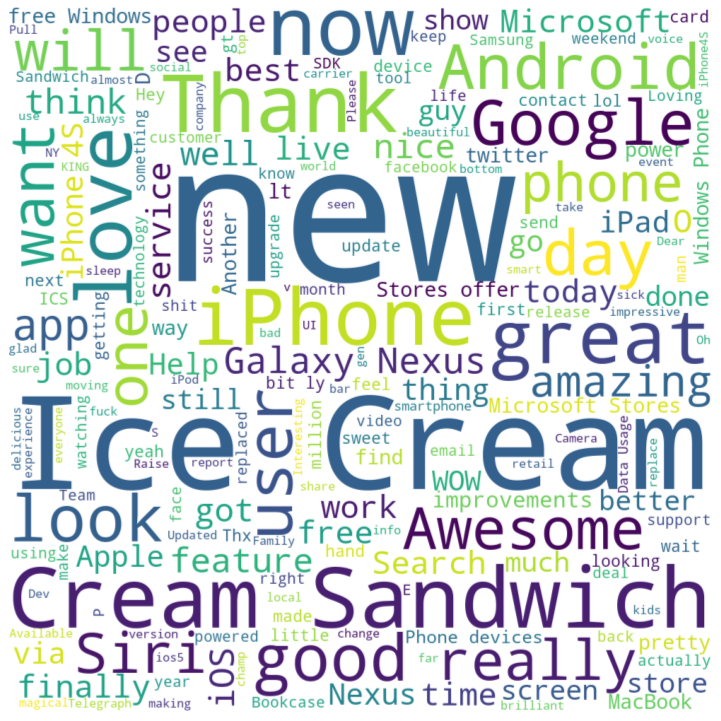

Neutral words


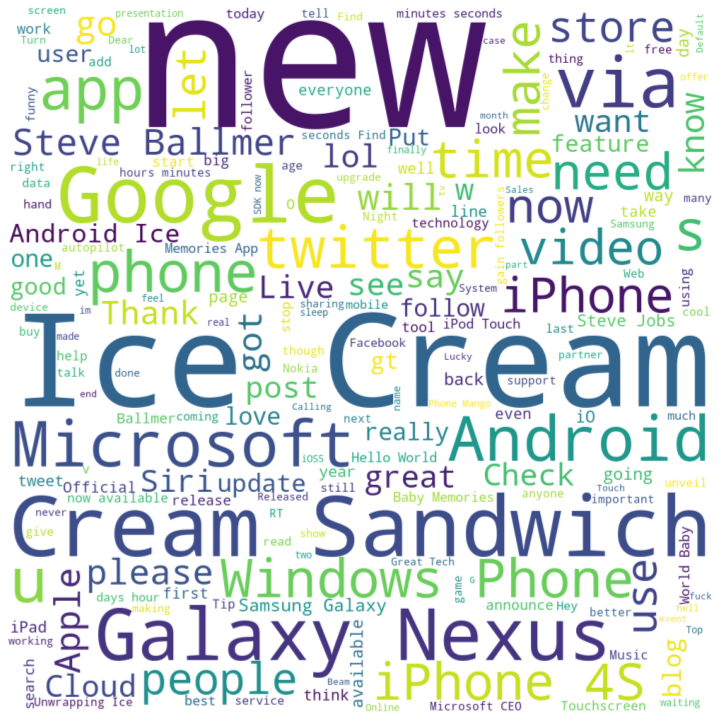

Negative words


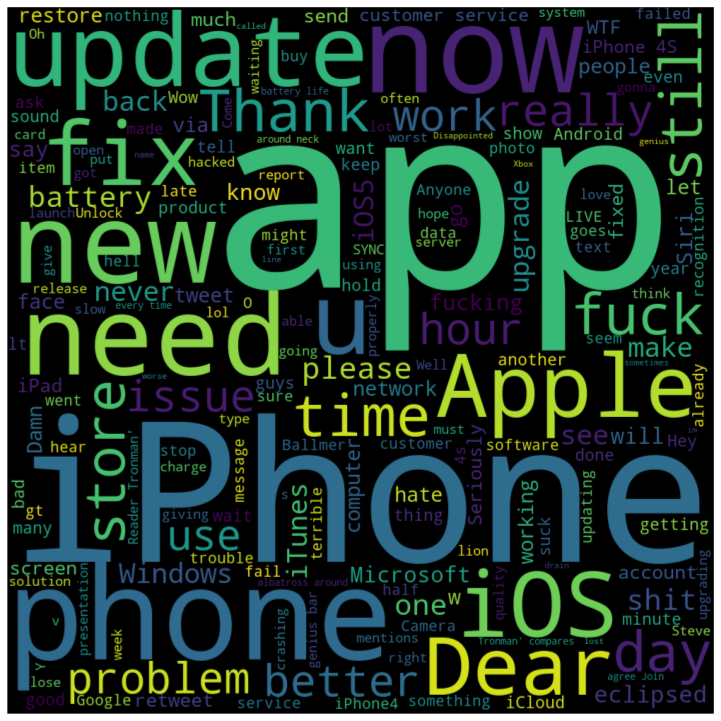

In [49]:
#可视化统计三种分类中出现最多的单词
from wordcloud import WordCloud,STOPWORDS

train_pos = []
train_neu = []
train_neg = []
for (index,x) in enumerate(traintxt):
    if trainY[index] == 'positive':
        train_pos.append(x)
    if trainY[index] == 'neutral':
        train_neu.append(x)
    if trainY[index] == 'negative':
        train_neg.append(x)
        
print('pos_num:' + str(len(train_pos)))
print('neu_num:' + str(len(train_neu)))
print('neg_num:' + str(len(train_neg)))

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=1000,
                      height=1000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(train_pos,'white')
print("Neutral words")
wordcloud_draw(train_neu,'white')
print("Negative words")
wordcloud_draw(train_neg)


观察上图可知，有很多名词在pos和neg中出现次数都非常多

### 第二部分：特征提取

主要使用word2vec和tfidf两种文本特征提取方法

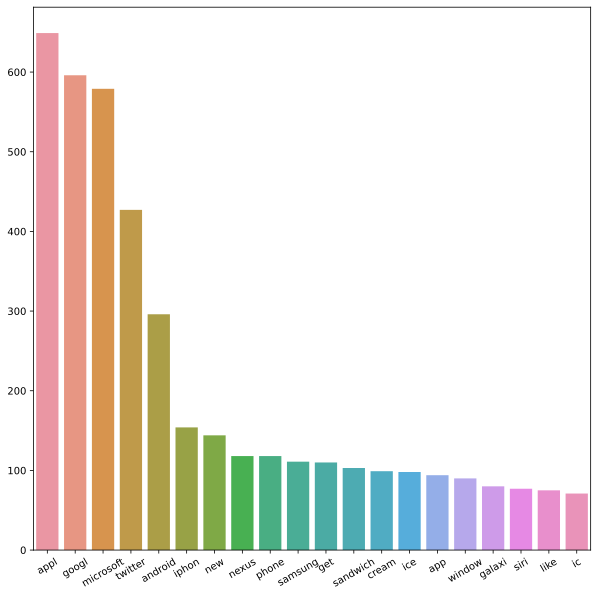

In [50]:
#划分给定trainData，方便之后在本地进行交叉验证
train_X, test_X, train_Y, test_Y = model_selection.train_test_split(featuredTrainData, trainY, test_size=0.2, random_state=1)

#自制flat函数
def flatten(t):
    return [item for sublist in t for item in sublist]
#统计划分后的训练集词频
dic_freq = nltk.FreqDist(flatten(train_X))

all_fdist = pd.Series(dict(dic_freq.most_common(20)))

fig, ax = plt.subplots(figsize=(10,10))
#画图
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
plt.xticks(rotation=30);


#预处理测试数据 (提交kaggle使用)
# train_X = featuredTrainData
# train_Y = trainY
# test_X = preProcess(testtxt)
# test_Y = trainY[:len(test_X)]

使用word2vec训练预处理数据得到词向量空间

主要使用参数有词向量维度，词最低频率，句子窗口大小和迭代训练次数。

词向量维度一般在200-300之间，鉴于我们数据量比较小及最终分类效果，取150

迭代次数一般在10左右，基于最终分类效果，取15

In [51]:
# 特征处理  使用word2vec建立向量
# 设置词语向量维度
num_featrues = 150
# 保证被考虑词语的最低频率
min_word_count = 3
# 设置词语上下窗口大小
context = 3
downsampling = 1e-3
#迭代次数
iter_time = 15

model = Word2Vec(train_X, vector_size= num_featrues,min_count=min_word_count, window=context, sample=downsampling,epochs = iter_time)
model.save('trainedWord2VecModel')

#构建每个单词对应的word2vec向量字典，方便之后计算文本的行向量
w2v = dict(zip(model.wv.index_to_key, model.wv.vectors))  #combination of word and its vector

#可以计算每个单词的最近单词
# model.wv.similar_by_word('appl', topn=10)

使用训练好的wrod2vec模型和TfidfVectorizer 分别计算训练集和测试集的wrod2vec和tfidf文本行向量，供分类器使用


word2vec的文本行向量计算过程：对每行每个单词的wod2vec向量相加取平均值即为当行的wod2vec向量（未出现的单词则为0向量）

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#计算数据集对应的word2vec向量
def transform(testData):
    return np.array([
        np.mean([w2v[w] for w in words if w in w2v]or [np.zeros(num_featrues)], axis=0)
        for words in testData
    ])


#基于word2vec 计算训练集文本行向量
train_X_w2v = transform(train_X)

#基于word2vec 计算测试集文本行向量
test_X_w2v = transform(test_X)



#tfidf将预处理后的分词列表拼接起来视为文本进行处理
tfidf_Train_X = []
for i in train_X:
    tfidf_Train_X.append(' '.join(i))
    
tfidf_Test_X = []
for i in test_X:
    tfidf_Test_X.append(' '.join(i))
    
tfidf_vectorizer = TfidfVectorizer(use_idf=True,norm='l2',min_df=2,smooth_idf=True,max_features=5000)


#基于tfidf 计算训练集文本行向量
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(tfidf_Train_X) 


#基于tfidf 计算测试集文本行向量
X_test_vectors_tfidf = tfidf_vectorizer.transform(tfidf_Test_X) 


In [70]:
shape(X_test_vectors_tfidf)
shape(X_train_vectors_tfidf)
shape(test_X)

(480,)

查询文档，在实现tdidf的tf过程中已经进行了归一化，且最终得到的文本词汇稀疏矩阵 再进行归一化效果其实不好，因此不进行归一化操作

### 第三部分：训练模型并寻找最优参数

对于文本多分类，除课本模型，还选取了随机森林、adaboost、Gradientboost等集成迭代算法。 以及多层感知机、cnn、lstm等神经网络（虽然因为样本量太小，认为神经网络 尤其是lstm 无法有效学习分类）

对于每种模型，我们都使用wrod2vec和tfidf进行训练及观察分类效果

选取表现最好的几种算法交叉验证调参 提高rank

#### 1、逻辑回归

In [53]:
#逻辑回归
#  Cs is an array of possible C values
#  cv is the number of folds
#  n_jobs=-1 means run in parallel with all cores
logreg = linear_model.LogisticRegressionCV(Cs=logspace(-4,4,20), cv=5, n_jobs=-1)
print('word2vec训练')
logreg.fit(train_X_w2v, train_Y)

# print("w=", logreg.coef_)
# print("b=", logreg.intercept_)


# 训练集验证
predY_train = logreg.predict(train_X_w2v)

# 正确率
acc = metrics.accuracy_score(train_Y, predY_train)
print("train accuracy=", acc)


# 测试集验证
predY_test = logreg.predict(test_X_w2v)

# 正确率
acc = metrics.accuracy_score(test_Y, predY_test)
print("test accuracy=", acc)



print('tfdif训练')
logreg.fit(X_train_vectors_tfidf, train_Y)
# 训练集验证
predY_train = logreg.predict(X_train_vectors_tfidf)

# 正确率
acc = metrics.accuracy_score(train_Y, predY_train)
print("train accuracy=", acc)


# 测试集验证
predY_test = logreg.predict(X_test_vectors_tfidf)

# 正确率
acc = metrics.accuracy_score(test_Y, predY_test)
print("test accuracy=", acc)


word2vec训练


G:\andconda\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


train accuracy= 0.7192066805845512
test accuracy= 0.725
tfdif训练
train accuracy= 0.9441544885177453
test accuracy= 0.75625


#### 2、多层感知机MLP
对层数size调参后后效果也不是很棒

In [63]:
#多层感知机
from sklearn.neural_network import MLPClassifier

paramgrid = {'alpha': [1e-5,1e-4,1e-3,1e-2],
             'hidden_layer_sizes': [(10,5),(20,10),(40,20),(50,20),(100,50)]}
mlp = MLPClassifier(solver='lbfgs', random_state=1)

clf = model_selection.GridSearchCV(mlp, paramgrid, cv=5,
                                     n_jobs=-1, verbose=True)
clf.fit(train_X_w2v, train_Y)
print('word2vec训练')
# 训练集验证
predY_train = clf.predict(train_X_w2v)

# 正确率
acc = metrics.accuracy_score(train_Y, predY_train)
print("train accuracy=", acc)


# 测试集验证
predY_test = clf.predict(test_X_w2v)

# calculate accuracy
acc = metrics.accuracy_score(test_Y, predY_test)
print("test accuracy=", acc)


print('tfidf训练')
clf.fit(X_train_vectors_tfidf, train_Y)
# 训练集验证
predY_train = clf.predict(X_train_vectors_tfidf)

# 正确率
acc = metrics.accuracy_score(train_Y, predY_train)
print("train accuracy=", acc)


# 测试集验证
predY_test = clf.predict(X_test_vectors_tfidf)

# 正确率
acc = metrics.accuracy_score(test_Y, predY_test)
print("test accuracy=", acc)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


G:\andconda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


word2vec训练
train accuracy= 0.6696242171189979
test accuracy= 0.6958333333333333
tfidf训练
Fitting 5 folds for each of 20 candidates, totalling 100 fits
train accuracy= 0.9921711899791231
test accuracy= 0.7291666666666666


G:\andconda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


#### 3、SVM

word2vec训练
Fitting 5 folds for each of 20 candidates, totalling 100 fits
train accuracy = 0.7656576200417536
test accuracy = 0.7416666666666667
tfdif训练
Fitting 5 folds for each of 20 candidates, totalling 100 fits
train accuracy= 0.9916492693110647
test accuracy= 0.7770833333333333
confusion_matrix
[[ 32  36   0]
 [  9 315  12]
 [  1  49  26]]


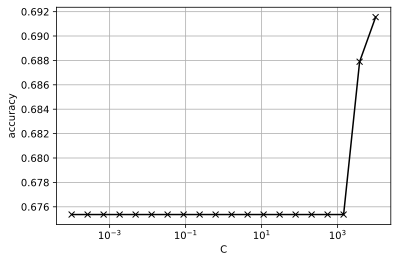

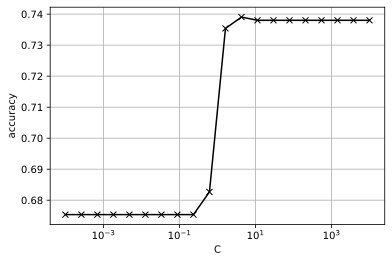

In [26]:
### SVM
from sklearn.metrics import confusion_matrix
# setup the list of parameters to try
paramgrid = {'C': logspace(-4,4,20)}

# setup the cross-validation object
# pass the SVM object, parameter grid, and number of CV folds
# set number of parallel jobs to -1 (use all cores)
svmcv = model_selection.GridSearchCV(svm.SVC(kernel='rbf',decision_function_shape='ovo'), paramgrid, cv=5,
                                     n_jobs=-1, verbose=True)
print('word2vec训练')
# run cross-validation (train for each split)
svmcv.fit(train_X_w2v, train_Y);

# make a plot
allC      = [p['C'] for p in svmcv.cv_results_['params']]
allscores = svmcv.cv_results_['mean_test_score']
    
plt.figure()
plt.semilogx(allC, allscores, 'kx-')
plt.xlabel('C'); plt.ylabel('accuracy')
plt.grid(True)


# Directly use svmcv to make predictions
predY_trainM = svmcv.predict(train_X_w2v)

acc = metrics.accuracy_score(train_Y, predY_trainM)
print("train accuracy = " + str(acc))

# Directly use svmcv to make predictions
predY_testM = svmcv.predict(test_X_w2v)

acc = metrics.accuracy_score(test_Y, predY_testM)
print("test accuracy = " + str(acc))


print('tfdif训练')
svmcv.fit(X_train_vectors_tfidf, train_Y)

# make a plot
allC      = [p['C'] for p in svmcv.cv_results_['params']]
allscores = svmcv.cv_results_['mean_test_score']
    
plt.figure()
plt.semilogx(allC, allscores, 'kx-')
plt.xlabel('C'); plt.ylabel('accuracy')
plt.grid(True)

# 训练集验证
predY_train = svmcv.predict(X_train_vectors_tfidf)

# 正确率
acc = metrics.accuracy_score(train_Y, predY_train)
print("train accuracy=", acc)


# 测试集验证
predY_test = svmcv.predict(X_test_vectors_tfidf)
write_csv_kaggle_sub("my_submission.csv", predY_test)
# 正确率
acc = metrics.accuracy_score(test_Y, predY_test)
print("test accuracy=", acc)

#混淆矩阵，分析分类器对每个种类的分类情况
print("confusion_matrix")
print(confusion_matrix(test_Y, predY_test, labels=['negative', 'neutral', 'positive']))



[[ 32  36   0]


 [  9 315  12]
 
 
 [  1  49  26]]
 
 
由代码输出的如上图confusion_matrix我们可知：

negative的预测率为32/68,且预测错误的情况全部为neutral

neutural的预测率为315/336,错误情况下预测为negative9个，预测为positive9个

positive的预测率为26/76,预测正确率最低，大部分都预测为了neutral，几乎没有negative和positive互相预测错误

因此我们还可以将negative和positie预测错误的情况打印出来，进行特征分析，看是否能对数据进一步预处理来提高这两个种类的预测率

#### 4、多项式朴素贝叶斯

计算平滑最佳值

G:\andconda\envs\tf\lib\site-packages\sklearn\naive_bayes.py:509: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


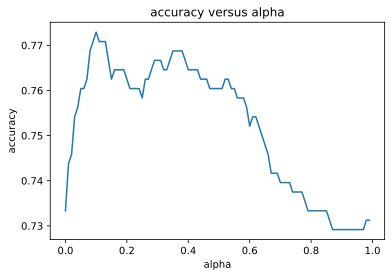

In [64]:
# 多项式朴素贝叶斯

xLabel = []
yLabel = []
for smoothing_alpha in range(0,100,1):
    # fit a multinomial model (with smoothing)
    
    mmodel_tf = naive_bayes.MultinomialNB(alpha= smoothing_alpha/100)
    mmodel_tf.fit(X_train_vectors_tfidf, train_Y)
    
    # prediction
    predYtf = mmodel_tf.predict(X_test_vectors_tfidf)

    # calculate accuracy
    acc = metrics.accuracy_score(test_Y, predYtf)
    xLabel.append(smoothing_alpha/100)
    yLabel.append(acc)
    
plt.title("accuracy versus alpha") 
plt.xlabel("alpha") 
plt.ylabel("accuracy") 
plt.plot(xLabel,yLabel) 
plt.show()



#### 5、AdaBoost

In [65]:
#adaboost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

adaboost_paramgrid = {'learning_rate': logspace(-6,0,20), 
             'n_estimators': array([50, 100, 200, 500])}
            

clf = model_selection.GridSearchCV(ensemble.AdaBoostClassifier(random_state=4487),adaboost_paramgrid, cv=5, n_jobs=-1)
clf.fit(train_X_w2v, train_Y)
print('word2vec训练')
# 训练集验证
predY_train = clf.predict(train_X_w2v)

# 正确率
acc = metrics.accuracy_score(train_Y, predY_train)
print("train accuracy=", acc)


# 测试集验证
predY_test = clf.predict(test_X_w2v)

# calculate accuracy
acc = metrics.accuracy_score(test_Y, predY_test)
print("test accuracy=", acc)


print('tfdif训练')
clf.fit(X_train_vectors_tfidf, train_Y)
print('最佳参数' + str(clf.best_params_))

# 训练集验证
predY_train = clf.predict(X_train_vectors_tfidf)

# 正确率
acc = metrics.accuracy_score(train_Y, predY_train)
print("train accuracy=", acc)


# 测试集验证
predY_test = clf.predict(X_test_vectors_tfidf)

# 正确率
acc = metrics.accuracy_score(test_Y, predY_test)
print("test accuracy=", acc)

word2vec训练
train accuracy= 0.675365344467641
test accuracy= 0.7
tfdif训练
最佳参数{'learning_rate': 0.11288378916846883, 'n_estimators': 500}
train accuracy= 0.7578288100208769
test accuracy= 0.7333333333333333


#### 6、随机森林

据检验，除n_estimators以外其他参数使用默认参数效果是最好的


在本地效果也是除svm外最好的，但是提交结果比本地预测率低2-3个百分点。
因为随机森林的原理，每次训练的模型效果都不同，提交有点碰运气的意思，所以最后还是用svm提交

In [8]:
#随机森林
from sklearn.ensemble import RandomForestClassifier

rf_paramsampler = {#'max_features': stats.uniform(0,1.0),
#                  'min_samples_split': stats.uniform(0,0.5), 
#                  'min_samples_leaf':  stats.uniform(0,0.5),
               }

rfc = model_selection.RandomizedSearchCV(
                            ensemble.RandomForestClassifier(n_estimators=150, random_state=4487, n_jobs=-1),
                            param_distributions=rf_paramsampler, 
                            random_state=4487, n_iter=1000, cv=5, 
                            verbose=1, n_jobs=-1)
rfc.fit(train_X_w2v, train_Y)
print('word2vec训练')
# 训练集验证
predY_train = rfc.predict(train_X_w2v)

# 正确率
acc = metrics.accuracy_score(train_Y, predY_train)
print("train accuracy=", acc)


# 测试集验证
predY_test = rfc.predict(test_X_w2v)

# calculate accuracy
acc = metrics.accuracy_score(test_Y, predY_test)
print("test accuracy=", acc)


print('tfdif训练')
rfc.fit(X_train_vectors_tfidf, train_Y)
# 训练集验证
predY_train = rfc.predict(X_train_vectors_tfidf)

# 正确率
acc = metrics.accuracy_score(train_Y, predY_train)
print("train accuracy=", acc)


# 测试集验证
predY_test = rfc.predict(X_test_vectors_tfidf)
write_csv_kaggle_sub("my_submission.csv", predY_test)
# 正确率
acc = metrics.accuracy_score(test_Y, predY_test)
print("test accuracy=", acc)

G:\andconda\envs\tf\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 1 is smaller than n_iter=1000. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
word2vec训练
train accuracy= 0.9921711899791231
test accuracy= 0.7270833333333333
tfdif训练
Fitting 5 folds for each of 1 candidates, totalling 5 fits


G:\andconda\envs\tf\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 1 is smaller than n_iter=1000. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


train accuracy= 0.9921711899791231
test accuracy= 0.7770833333333333


#### 7、GradientBoosting

In [17]:
#GB
import xgboost as xgb

# use "multi:softprob" for multi-class classification
xclf = xgb.XGBClassifier(objective="binary:softprob", random_state=4487)

# setup the list of parameters to try
paramgrid = {'learning_rate': array([0.01, 0.02, 0.05, 0.1, 0.15, 0.2, 0.3]),
             'n_estimators': array([10, 15, 20, 25, 50, 100,150,200])
            }

# setup the cross-validation object
xgbclf = model_selection.GridSearchCV(xclf, paramgrid, cv=5, n_jobs=-1)

xgbclf.fit(train_X_w2v, train_Y)
print('word2vec训练')
print("best params:", xgbclf.best_params_)
# 训练集验证
predY_train = xgbclf.predict(train_X_w2v)

# 正确率
acc = metrics.accuracy_score(train_Y, predY_train)
print("train accuracy=", acc)


# 测试集验证
predY_test = xgbclf.predict(test_X_w2v)

# calculate accuracy
acc = metrics.accuracy_score(test_Y, predY_test)
print("test accuracy=", acc)


print('tfdif训练')
xgbclf.fit(X_train_vectors_tfidf, train_Y)
print("best params:", xgbclf.best_params_)
# 训练集验证
predY_train = xgbclf.predict(X_train_vectors_tfidf)

# 正确率
acc = metrics.accuracy_score(train_Y, predY_train)
print("train accuracy=", acc)


# 测试集验证
predY_test = xgbclf.predict(X_test_vectors_tfidf)
write_csv_kaggle_sub("my_submission.csv", predY_test)
# 正确率
acc = metrics.accuracy_score(test_Y, predY_test)
print("test accuracy=", acc)

G:\andconda\envs\tf\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:23:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
word2vec训练
best params: {'learning_rate': 0.05, 'n_estimators': 200}
train accuracy= 0.9878964941569283
test accuracy= 0.6313229571984436
tfdif训练


G:\andconda\envs\tf\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:24:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
best params: {'learning_rate': 0.2, 'n_estimators': 200}
train accuracy= 0.9520033388981636
test accuracy= 0.5982490272373541


#### 8、word2vec+cnn
结果非常不理想 应该是数据集样本太少

In [ ]:
#CNN
from keras.layers import Embedding
from keras.layers import Dense, Input, Flatten, Dropout
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical

embedding_layer = Embedding(len(train_X_w2v) ,
                            num_featrues,
                            weights=[train_X_w2v],
                            input_length=200,
                            trainable=False)
number_Train_Y=[]
for i in train_Y:
    if i=='neutral':
        number_Train_Y.append(0)
    if i=='positive':
        number_Train_Y.append(1)
    if i=='negative':
        number_Train_Y.append(-1)

cnn_Train_Y =  to_categorical(number_Train_Y, 3)
model = Sequential()
model.add(embedding_layer)
model.add(Dropout(0.2))
model.add(Conv1D(250, 3, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(3))
model.add(Flatten())
model.add(Dense(num_featrues, activation='relu'))
model.add(Dense(unique(trainY).shape[0], activation='softmax'))
model.summary()
#plot_model(model, to_file='model.png',show_shapes=True)
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])
model.fit(train_X_w2v, cnn_Train_Y, epochs=2, batch_size=128)
model.evaluate(test_X_w2v, test_Y)

个人认为因为训练集样本量太小，所以word2vec+cnn、lstm这些和神经网络相关的算法表现都不好。因此对tfidf+svm、rf、lr进行交叉验证调参，提高leaderboard rank


主要调参参数：

1）tfidf的字典大小

2）最小词频（最少在几个文档中出现才纳入考虑）

3）正则化种类（一般来说都是l2表现更好）

4) svm核函数种类（主要是测试rbf和lineaf）

5) svm多分类策略（一般来说ovo好于ovr）

svm算法调参
Fitting 5 folds for each of 400 candidates, totalling 2000 fits
500    0.7895833333333333
svm算法调参
Fitting 5 folds for each of 400 candidates, totalling 2000 fits
520    0.7791666666666667
svm算法调参
Fitting 5 folds for each of 400 candidates, totalling 2000 fits
540    0.775
svm算法调参
Fitting 5 folds for each of 400 candidates, totalling 2000 fits
560    0.775
svm算法调参
Fitting 5 folds for each of 400 candidates, totalling 2000 fits
580    0.7770833333333333
svm算法调参
Fitting 5 folds for each of 400 candidates, totalling 2000 fits
600    0.7729166666666667
svm算法调参
Fitting 5 folds for each of 400 candidates, totalling 2000 fits
620    0.7770833333333333
svm算法调参
Fitting 5 folds for each of 400 candidates, totalling 2000 fits
640    0.7708333333333334
svm算法调参
Fitting 5 folds for each of 400 candidates, totalling 2000 fits
660    0.7833333333333333
svm算法调参
Fitting 5 folds for each of 400 candidates, totalling 2000 fits
680    0.7729166666666667


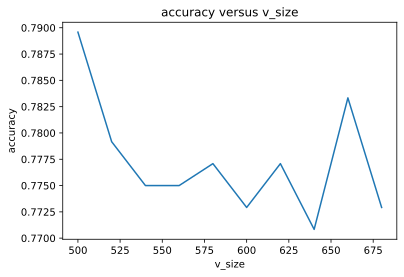

In [9]:
#选取表现最好的三个算法：svm 随机森林 逻辑回归
#遍历v_cab值 观察各个算法表现（svm、rf、lr）

# 最小词频
min_count = 2
xLabel = []
yLabel = []

#字典大小上下界及跨度
min_vSize = 500
max_vSize = 700
v_gap = 20

for v_size in range(min_vSize,max_vSize,v_gap):
    tfidf_vectorizer = TfidfVectorizer(use_idf=True,norm='l2',min_df=min_count,smooth_idf= True,max_features=v_size)
    #基于tfidf 计算训练集文本行向量
    X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(tfidf_Train_X) 

    #基于tfidf 计算测试集文本行向量
    X_test_vectors_tfidf = tfidf_vectorizer.transform(tfidf_Test_X) 
    
    paramgrid = {'C': logspace(-4,4,20),
                'gamma': logspace(-4,3,20)}
#   #svm
    print('svm算法调参')
    svmcv = model_selection.GridSearchCV(svm.SVC(kernel='rbf',decision_function_shape='ovo'), paramgrid, cv=5,
                                         n_jobs=-1, verbose=True)
    svmcv.fit(X_train_vectors_tfidf, train_Y)

    # 测试集验证
    predY_test = svmcv.predict(X_test_vectors_tfidf)
    
    # 正确率
    acc = metrics.accuracy_score(test_Y, predY_test)
    xLabel.append(v_size)
    print(str(v_size) +'    ' + str(acc))
    yLabel.append(acc)

    #随机森林
#     accList=[]
#     print('随机森林算法调参')
#     for i in range(1,10,1):
#         rfc = RandomForestClassifier(bootstrap = True,n_estimators=150)
#         rfc.fit(X_train_vectors_tfidf, train_Y)

#         # 测试集验证
#         predY_test = rfc.predict(X_test_vectors_tfidf)

#         # 正确率
#         acc = metrics.accuracy_score(test_Y, predY_test)
#         accList.append(acc) 
#     xLabel.append(v_size)
#     print(str(v_size) + '    ' + str(sum(accList)/len(accList)))
#     yLabel.append(sum(accList)/len(accList))

    #lr
#     print('逻辑回归算法调参')
#     logreg = linear_model.LogisticRegressionCV(Cs=logspace(-4,4,20), cv=5, n_jobs=-1)
#     logreg.fit(X_train_vectors_tfidf, train_Y)

#     # 测试集验证
#     predY_test = logreg.predict(X_test_vectors_tfidf)

#     # 正确率
#     acc = metrics.accuracy_score(test_Y, predY_test)
#     cross_acc+=acc
#     xLabel.append(v_size)
#     print(acc)
#     yLabel.append(acc)
    
plt.title("accuracy versus v_size") 
plt.xlabel("v_size") 
plt.ylabel("accuracy") 
plt.plot(xLabel,yLabel) 
plt.show()

### 四、实验总结

进行调参后，word2vec在相同算法参数下，比tfidf平均低3%-5%的准确率，分析原因是样本数太少，神经网络无法训练出符合样本特征的词向量空间。

因此比较tfidf下各算法相同参数下自己划分数据集验证最好表现情况：

逻辑回归：0.76

多层感知机MLP：0.73

SVM: 0.78

MultinomialNB: 0.77

AdaBoost: 0.73 

随机森林： 0.78

GradientBoost：0.77


最终提交acc为0.80350 

In [121]:
#test，对指定行数据进行处理并打印 预处理开发过程使用
from zhon.hanzi import punctuation
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

#选取第n行数据进行预处理
row = 2192

#使用Snowball词干提取器(据说比porter表现好，之后可以都尝试下)
ps = SnowballStemmer('english')

#词形还原器
lm = WordNetLemmatizer()

## 展示第一行处理前后的结果对比
text = traintxt[row]
print('原始数据: ' + text)
tempText=text.lower()
for i in string.punctuation:
    tempText = tempText.replace(i,'')
    
for i in punctuation:
    tempText = tempText.replace(i,'')
print('去掉标点符号的数据: ' + text)

words = nltk.word_tokenize(tempText)

#根据观察，数据集中去掉符号后的网页链接(http开头)可以直接去除，但是单独的http和https不行
filtered_words = [word for word in words if  (word.startswith('http') == 0 or word ==  'http' or word ==  'https')]
#处理特殊情况（网页链接与前单词只有标点从而被视为一个单词，如2194行数据）
for index,word in enumerate(filtered_words):
    if 'http' in word and word != 'https':
        print(word.split('http'))
        filtered_words[index] = word.split('http')[0]
        print(word)
        
print('去掉网页链接的数据:')
print(filtered_words)

res= [w for w in filtered_words if not w in nltk.corpus.stopwords.words('english')]
print('去掉英文停顿词的数据:')
print(res)

#提取词干
stemedRes = [ps.stem(word) for word in res]
print('提取词干后的数据:')
print(stemedRes)

#词性标注
taged_Res = nltk.pos_tag(stemedRes)
print('识别词性，提高词形还原正确性:')
print(taged_Res)

#将标注的复杂词性转化为4个基本词性，供词性还原使用(词性还原默认为名词)
def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
#词性还原
lemmaed_words = [lm.lemmatize(word[0],get_wordnet_pos(word[0])) for word in taged_Res]

print('词形还原后的数据:')
print(lemmaed_words)

print(lm.lemmatize('looking',wordnet.VERB))


原始数据: Windows Phone Mango Update Released to 'Nearly Everyone' http://t.co/SX1NQJJ1 #microsoft #Technology
去掉标点符号的数据: Windows Phone Mango Update Released to 'Nearly Everyone' http://t.co/SX1NQJJ1 #microsoft #Technology
去掉网页链接的数据:
['windows', 'phone', 'mango', 'update', 'released', 'to', 'nearly', 'everyone', 'microsoft', 'technology']
去掉英文停顿词的数据:
['windows', 'phone', 'mango', 'update', 'released', 'nearly', 'everyone', 'microsoft', 'technology']
提取词干后的数据:
['window', 'phone', 'mango', 'updat', 'releas', 'near', 'everyon', 'microsoft', 'technolog']
识别词性，提高词形还原正确性:
[('window', 'NN'), ('phone', 'NN'), ('mango', 'NN'), ('updat', 'JJ'), ('releas', 'NN'), ('near', 'IN'), ('everyon', 'JJ'), ('microsoft', 'NNS'), ('technolog', 'NN')]
词形还原后的数据:
['window', 'phone', 'mango', 'updat', 'releas', 'near', 'everyon', 'microsoft', 'technolog']
look


['negative' 'neutral' 'positive']


3